In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split

# Example DataFrame
df = pd.DataFrame({
    "X1": [1, 2, 3, 4, 5],
    "X2": [2, 4, 6, 8, 10],
    "y_reg": [3, 6, 9, 12, 15],
    "y_cls": [0, 1, 1, 0, 1]
})

X = df[["X1", "X2"]]
y_reg = df["y_reg"]
y_cls = df["y_cls"]

# Regression
reg = LinearRegression().fit(X, y_reg)
pred_reg = reg.predict(X)
print("Regression MSE:", mean_squared_error(y_reg, pred_reg))

# Classification
cls = LogisticRegression().fit(X, y_cls)
pred_cls = cls.predict(X)
print("Classification Accuracy:", accuracy_score(y_cls, pred_cls))


Regression MSE: 4.2992919334545145e-30
Classification Accuracy: 0.8


Data Aquisition

In [2]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol
ticker = 'AAPL'

# Fetch data
stock_data = yf.download(ticker, start='2015-01-01', end='2023-12-31')

# Display the first few rows
stock_data.head()


/var/folders/ls/rcj43y9j0d38d39d28pbbfz40000gn/T/ipykernel_65389/488216718.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
2015-01-05,23.577579,24.110156,23.391179,24.030269,257142000
2015-01-06,23.579792,23.839422,23.218083,23.641926,263188400
2015-01-07,23.910429,24.010286,23.677426,23.788380,160423600
2015-01-08,24.829124,24.886821,24.121242,24.238854,237458000


In [3]:
# Check data types
stock_data.info()

# Summary statistics
stock_data.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2264 entries, 2015-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2264 non-null   float64
 1   (High, AAPL)    2264 non-null   float64
 2   (Low, AAPL)     2264 non-null   float64
 3   (Open, AAPL)    2264 non-null   float64
 4   (Volume, AAPL)  2264 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 106.1 KB


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2264.000000,2264.000000,2264.000000,2264.000000,2.264000e+03
mean,81.473613,82.298941,80.566231,81.405126,1.237614e+08
std,56.045157,56.619031,55.409547,55.990449,6.818417e+07
min,20.624048,20.927680,20.425434,20.546430,2.404830e+07
25%,32.846512,33.042880,32.665197,32.858672,7.831732e+07
50%,51.270496,52.082595,50.895860,51.417507,1.056556e+08
75%,139.152393,140.840225,136.649093,139.093869,1.486811e+08
max,196.446823,197.944141,195.346124,196.357582,6.488252e+08


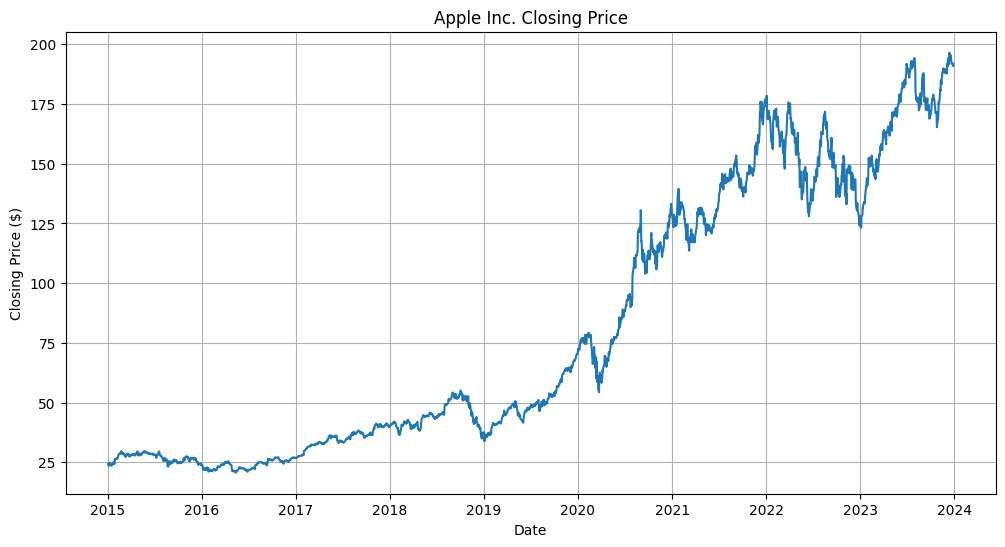

In [4]:
import matplotlib.pyplot as plt

# Plot closing price
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'])
plt.title('Apple Inc. Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()


In [5]:
# Check for missing values
print(stock_data.isnull().sum())

# Fill missing values if any
stock_data.fillna(method='ffill', inplace=True)


Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64


/var/folders/ls/rcj43y9j0d38d39d28pbbfz40000gn/T/ipykernel_65389/3240730632.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True)


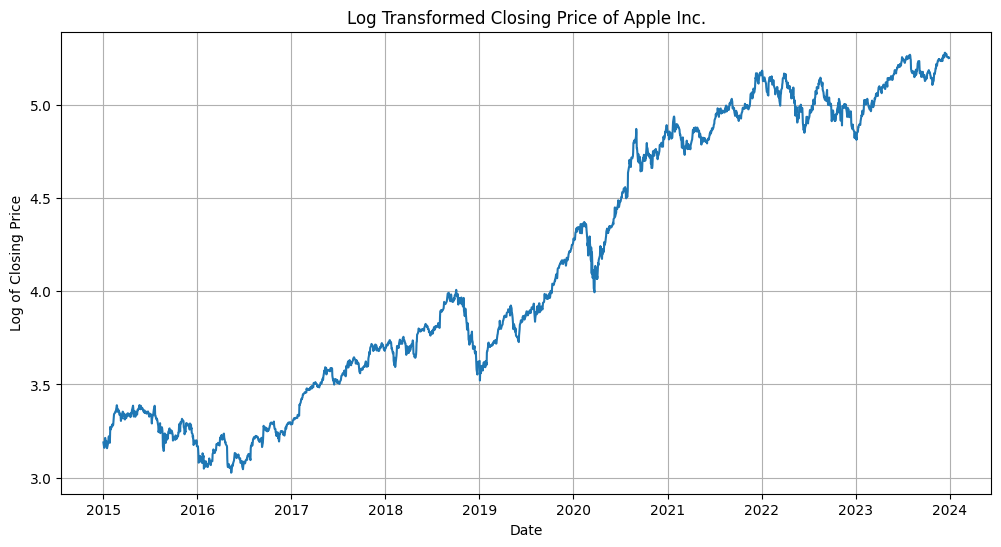

In [6]:
import numpy as np

# Extract 'Close' price
df_close = stock_data['Close']

# Apply log transformation
df_log = np.log(df_close)

# Plot the transformed data
plt.figure(figsize=(12,6))
plt.plot(df_log)
plt.title('Log Transformed Closing Price of Apple Inc.')
plt.xlabel('Date')
plt.ylabel('Log of Closing Price')
plt.grid(True)
plt.show()


8. Module 4: Exploratory Data Analysis (EDA)

In [7]:
# 8.1 Statistical Summary
# Get a statistical summary of the closing prices.
df_close.describe()

Ticker,AAPL
count,2264.000000
mean,81.473613
std,56.045157
min,20.624048
25%,32.846512
50%,51.270496
75%,139.152393
max,196.446823


<Figure size 1200x600 with 0 Axes>

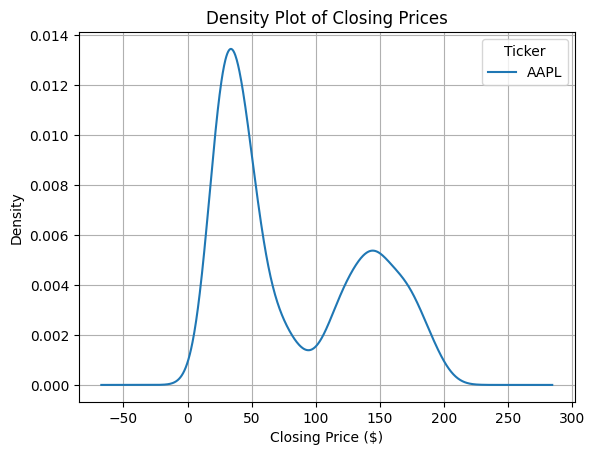

In [8]:
# 8.2 Distribution of Closing Prices
# Plot the distribution to understand the skewness and kurtosis.


# Density plot
plt.figure(figsize=(12,6))
df_close.plot(kind='kde')
plt.title('Density Plot of Closing Prices')
plt.xlabel('Closing Price ($)')
plt.grid(True)
plt.show()


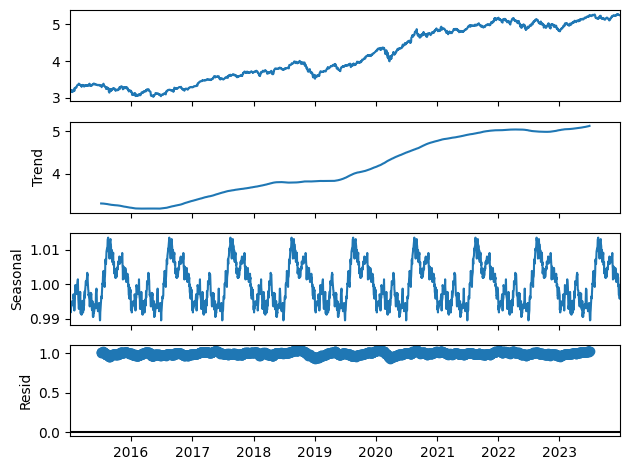

In [9]:
# 8.3 Decomposing Time Series
# Decompose the time series to observe trend and seasonality.

from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df_log, model='multiplicative', period=252)  # Approximate trading days in a year

# Plot decomposition
result.plot()
plt.show()


9. Module 5: Stationarity Testing

In [10]:
# 9.1 Understanding Stationarity
# A stationary time series has constant mean and variance over time. Most time series models assume stationarity.


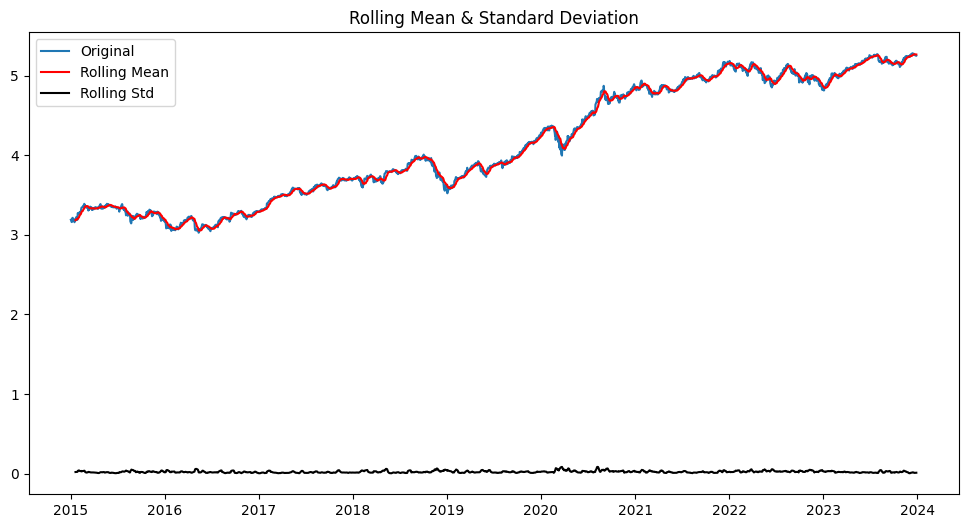

Results of Augmented Dickey-Fuller Test:
Test Statistic                   -0.388165
p-value                           0.912056
#Lags Used                        9.000000
Number of Observations Used    2254.000000
Critical Value (1%)              -3.433255
Critical Value (5%)              -2.862823
Critical Value (10%)             -2.567453
dtype: float64


In [11]:
# 9.2 Augmented Dickey-Fuller Test
# Use the ADF test to check for stationarity.

from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics
    plt.figure(figsize=(12,6))
    plt.plot(timeseries, label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    # Perform ADF test
    print('Results of Augmented Dickey-Fuller Test:')
    adf_test = adfuller(timeseries, autolag='AIC')
    adf_output = pd.Series(adf_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key, value in adf_test[4].items():
        adf_output['Critical Value (%s)' % key] = value
    print(adf_output)

# Test stationarity
test_stationarity(df_log)



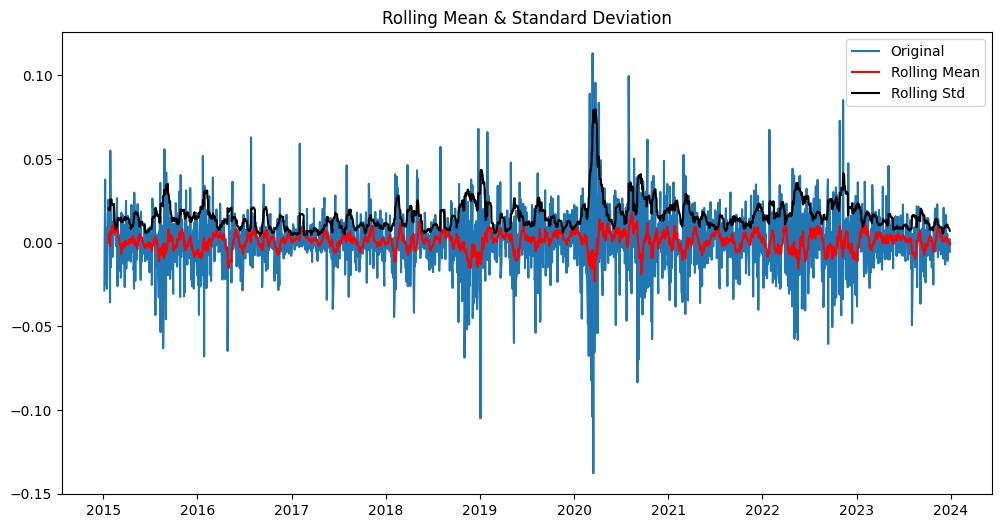

Results of Augmented Dickey-Fuller Test:
Test Statistic                -1.471526e+01
p-value                        2.806521e-27
#Lags Used                     8.000000e+00
Number of Observations Used    2.254000e+03
Critical Value (1%)           -3.433255e+00
Critical Value (5%)           -2.862823e+00
Critical Value (10%)          -2.567453e+00
dtype: float64


In [12]:
# 9.3 Differencing to Achieve Stationarity
# If the series is non-stationary, apply differencing.


# Differencing
df_log_diff = df_log.diff().dropna()

# Test stationarity again
test_stationarity(df_log_diff)


# 10. Module 6: Determining ARIMA Parameters

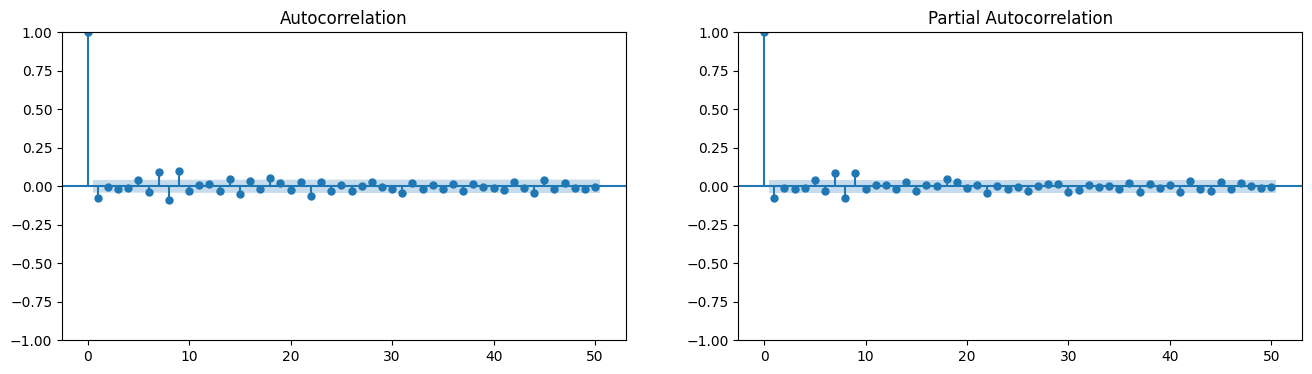

In [13]:
# 10.1 Autocorrelation and Partial Autocorrelation Plots
# Plot ACF and PACF to identify potential values of p and q.

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
fig, axes = plt.subplots(1, 2, figsize=(16,4))
plot_acf(df_log_diff, lags=50, ax=axes[0])
plot_pacf(df_log_diff, lags=50, ax=axes[1])
plt.show()



/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-11692.062, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-11682.843, Time=0.11 sec


/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-11693.670, Time=0.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-11693.899, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-11679.232, Time=0.06 sec


/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-11691.996, Time=0.11 sec


/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-11692.084, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-11689.288, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.590 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2264
Model:               SARIMAX(0, 1, 1)   Log Likelihood                5849.950
Date:                Sat, 23 Aug 2025   AIC                         -11693.899
Time:                        18:28:33   BIC                         -11676.726
Sample:                             0   HQIC                        -11687.633
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------

/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


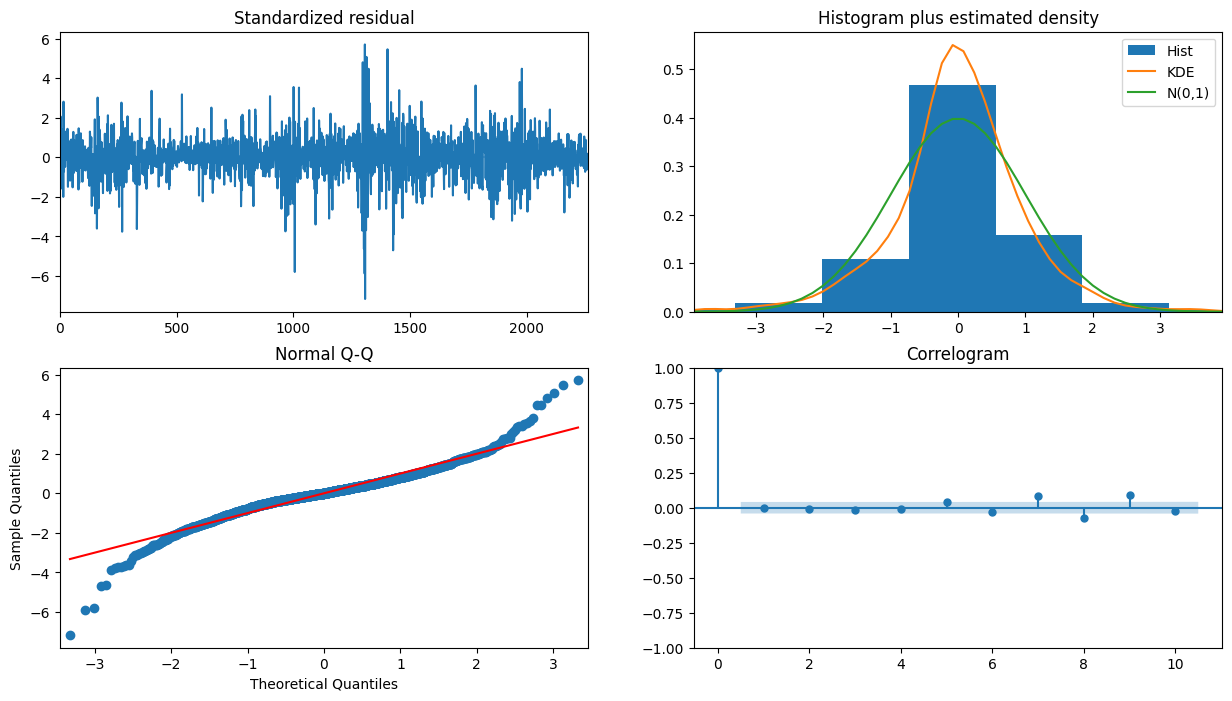

In [14]:
# 10.2 Using Auto ARIMA to Find Optimal Parameters

import pmdarima as pm

# Auto ARIMA
model_autoARIMA = pm.auto_arima(df_log, start_p=1, start_q=1,
                                test='adf',       # use adf test to find optimal 'd'
                                max_p=5, max_q=5, # maximum p and q
                                m=1,              # frequency of series
                                d=None,           # let model determine 'd'
                                seasonal=False,   # No Seasonality
                                start_P=0, 
                                D=0, 
                                trace=True,
                                error_action='ignore',  
                                suppress_warnings=True, 
                                stepwise=True)

print(model_autoARIMA.summary())

# Plot diagnostics
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()


11. Module 7: Model Building

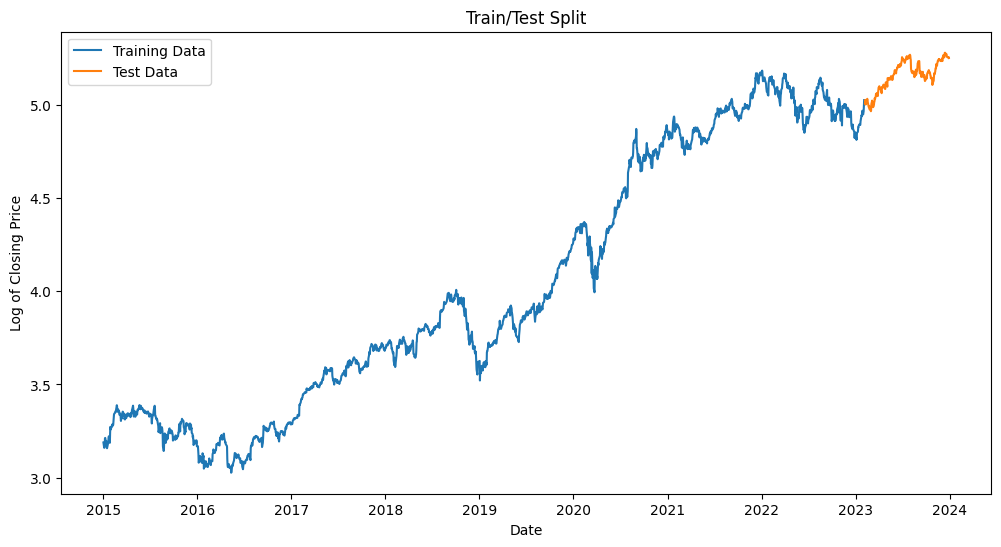

In [15]:
# 11.1 Splitting the Data
# Divide the data into training and testing sets.

# Split data
train_size = int(len(df_log) * 0.9)
train_data, test_data = df_log[:train_size], df_log[train_size:]

# Plot training and testing data
plt.figure(figsize=(12,6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.title('Train/Test Split')
plt.xlabel('Date')
plt.ylabel('Log of Closing Price')
plt.legend()
plt.show()


In [16]:
# 11.2 Fitting the ARIMA Model
# Fit the ARIMA model using the optimal parameters from auto_arima.

from statsmodels.tsa.arima.model import ARIMA

# Build and fit the model
model = ARIMA(train_data, order=model_autoARIMA.order)
model_fit = model.fit()
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 2037
Model:                 ARIMA(0, 1, 1)   Log Likelihood                5199.696
Date:                Sat, 23 Aug 2025   AIC                         -10395.392
Time:                        20:18:28   BIC                         -10384.154
Sample:                             0   HQIC                        -10391.269
                               - 2037                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0788      0.015     -5.420      0.000      -0.107      -0.050
sigma2         0.0004   6.41e-06     55.193      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


12. Module 8: Model Diagnostics

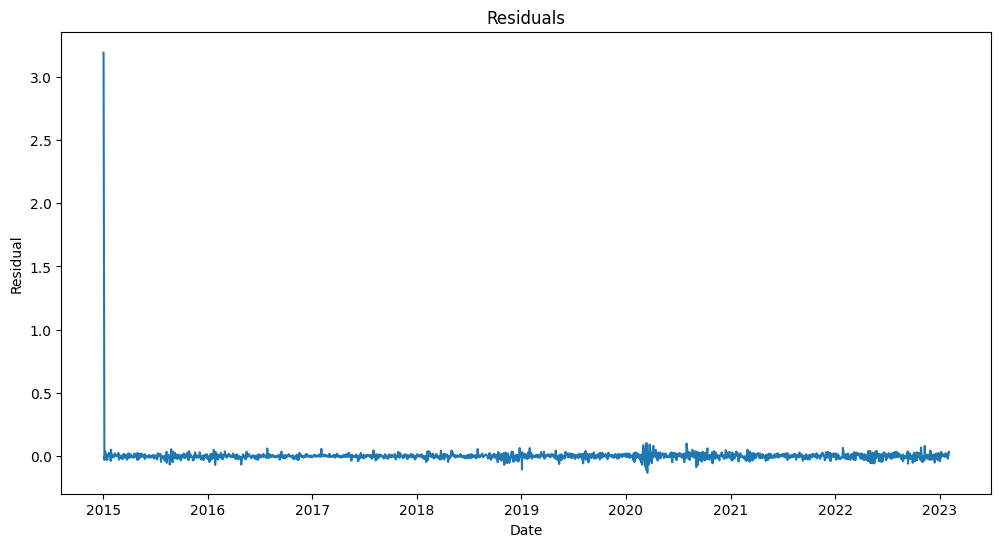

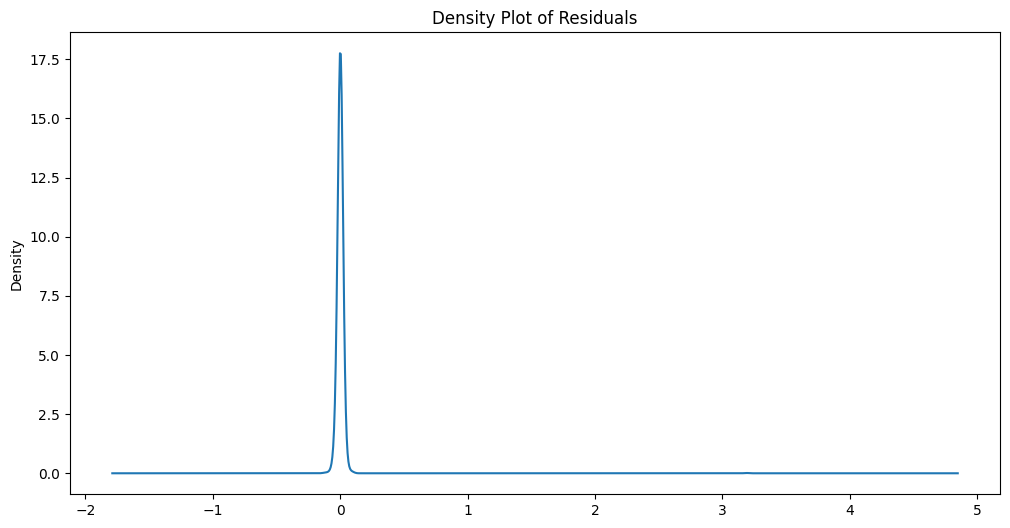

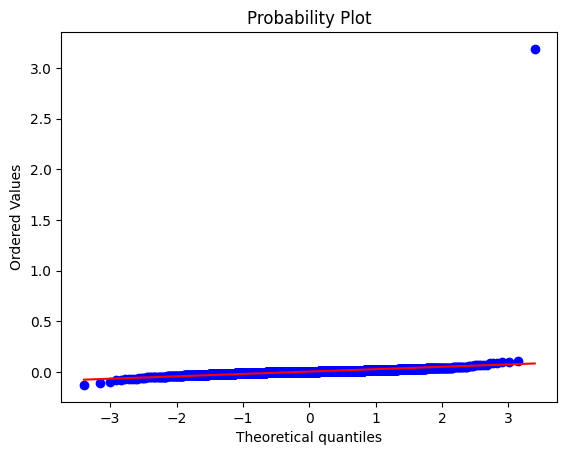

In [17]:
# 12.1 Residual Analysis
# Analyze residuals to check the adequacy of the model.

# Residuals plot
residuals = model_fit.resid

# Plot residuals
plt.figure(figsize=(12,6))
plt.plot(residuals)
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()

# Density plot of residuals
plt.figure(figsize=(12,6))
residuals.plot(kind='kde')
plt.title('Density Plot of Residuals')
plt.show()

# QQ plot
import scipy.stats as stats
import pylab

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()


13. Module 9: Forecasting Future Stock Prices

In [19]:
# 13.1 Generating Forecasts
# Forecast the closing prices for the test data period.

# Forecast
forecast_steps = len(test_data)
forecast_result = model_fit.get_forecast(steps=forecast_steps)
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Convert forecast to original scale
forecast_series = np.exp(forecast)
lower_series = np.exp(conf_int.iloc[:, 0])
upper_series = np.exp(conf_int.iloc[:, 1])


/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/apple/miniconda3/envs/quant2/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


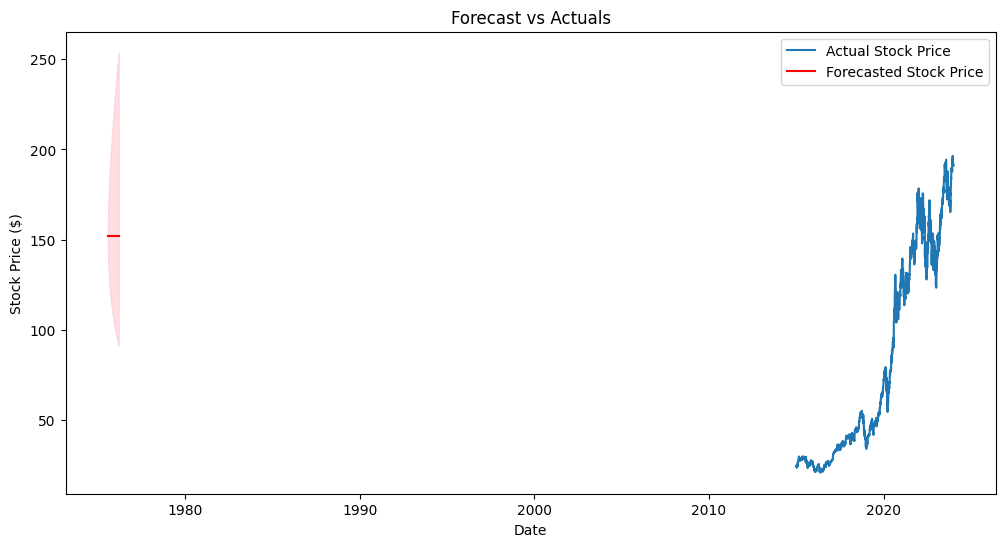

In [20]:
# 13.2 Visualizing Forecasts
# Plot the forecasted values against the actual values.

# Actual test data in original scale
test_data_actual = np.exp(test_data)

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_close, label='Actual Stock Price')
plt.plot(forecast_series, color='red', label='Forecasted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='pink', alpha=0.5)
plt.title('Forecast vs Actuals')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.show()


14. Module 10: Model Evaluation

In [21]:
# 14.1 Evaluating Forecast Accuracy
# Calculate evaluation metrics.
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate metrics
mse = mean_squared_error(test_data_actual, forecast_series)
mae = mean_absolute_error(test_data_actual, forecast_series)
rmse = np.sqrt(mse)
mape = np.mean(np.abs(forecast_series - test_data_actual)/np.abs(test_data_actual))*100

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')



Mean Absolute Error (MAE): 22.93
Mean Squared Error (MSE): 680.55
Root Mean Squared Error (RMSE): 26.09
Mean Absolute Percentage Error (MAPE): nan%
